In [1]:
library(data.table)
library(foreign)
library(sandwich)
library(lmtest)
library(stargazer)
library(lfe)
library(car)
library(ggplot2)
options(digits=5)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 


Loading required package: Matrix


Attaching package: ‘lfe’


The following object is masked from ‘package:lmtest’:

    waldtest


Loading required package: carData



## Null & Alternate Hypothesis 

- _NULL Hypothesis_ : **Flagging fake/misleading posts on social media has no effect on their believability**
- _Alternate Hypothesis_ : **Flagging fake/misleading posts on social media reduce their believability**


## Calculating the sample size

In this section, we calculate the minimum required sample size for our experiment. 

The statistical power of an experiment is the experiment's abilitiy to reject the NULL hypothesis when a specific alternate hypothesis is true.

$$ \alpha = P(\text{reject}\ H_0 | H_0) $$

where $ \alpha $ is the significance level. We select a significance level of $\alpha = 0.05$ as a tolerance for Type I errors in our experiment. 

Now that we have chosen our significance level, we would like to minimize the probability of Type II error. i.e. we would like to **maximize** the power of our test against the relevan alternative. Mathematically, power is 

$$ power = 1 - P_r(\text{Type II Error}) = P_r(\text{reject}\ H_0 | H_1 \text{is true}) $$

- We would set the required power of our experiment to be **80%** for this study as a reasonable expectation.
- To calculate the power for the test, we need to conjecture an expected ATE and the standard deviation for the outcome in the experiment. 
- The outcome is a rating on a scale of 0-10 on how successfull the red flag was in reducing the believability of the fake/misleading social media post. We would like our experiment to be able detect a difference in means of minimum 2 points on this scale. 
- We do expect the measured values for this rating to vary significantly as we poll subjects with different political opinions, life experiences and political affiliations. To be on the conservative side, we would like to have enough power in our experiment to minimize Type II errors when the std. deviation is at least 2.5 times the minimum detectable treatment effect. 

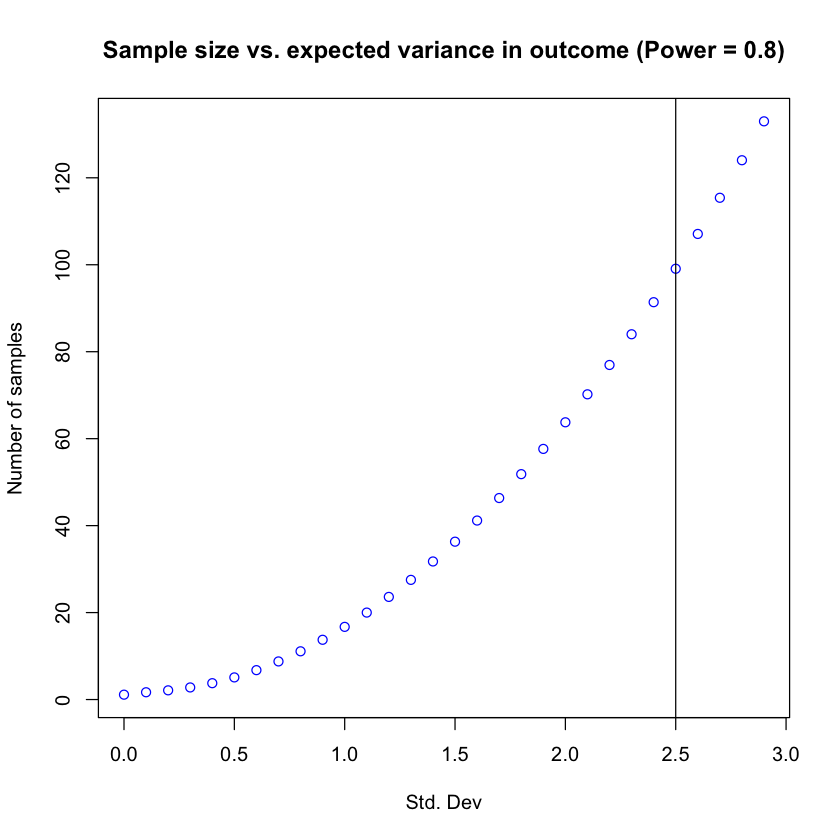

In [2]:
power_sim <- function(ate,sig_level=0.05,power=0.8,alternate_hyp="two.sided",max_ratio = 10){
    result <- NA
    sims <- seq(1e-5,max_ratio,by=0.1)
    for(i in seq_along(sims)){
        result[i] <- power.t.test(d=ate, 
                               sig.level=sig_level, 
                               power=power,
                               sd=ate*sims[i],
                               alternative=alternate_hyp)$n
        }
    return(result)
    }
max_ratio <- 3
expected_ate <- 5
x <- seq(1e-5,max_ratio, by = 0.1)
samples <- power_sim(ate=expected_ate,max_ratio = max_ratio)
plot(x = x, y=samples,col = 'blue',
     xlab="Std. Dev",
     ylab = 'Number of samples',
     main = "Sample size vs. expected variance in outcome (Power = 0.8)")
abline(v=2.5,col='black',lwd=1)

The above plot shows that we need a minimum sample size of 100 to achieve a power of 0.8 when the outcome variable has a standard deviation 2.5 times the treatment effect. 

The plot below, validates that the absolute value of minimum treatment effect doesn't change the sample size requirement significantly and that this is determined mostly by the expected variance in the measurement data.

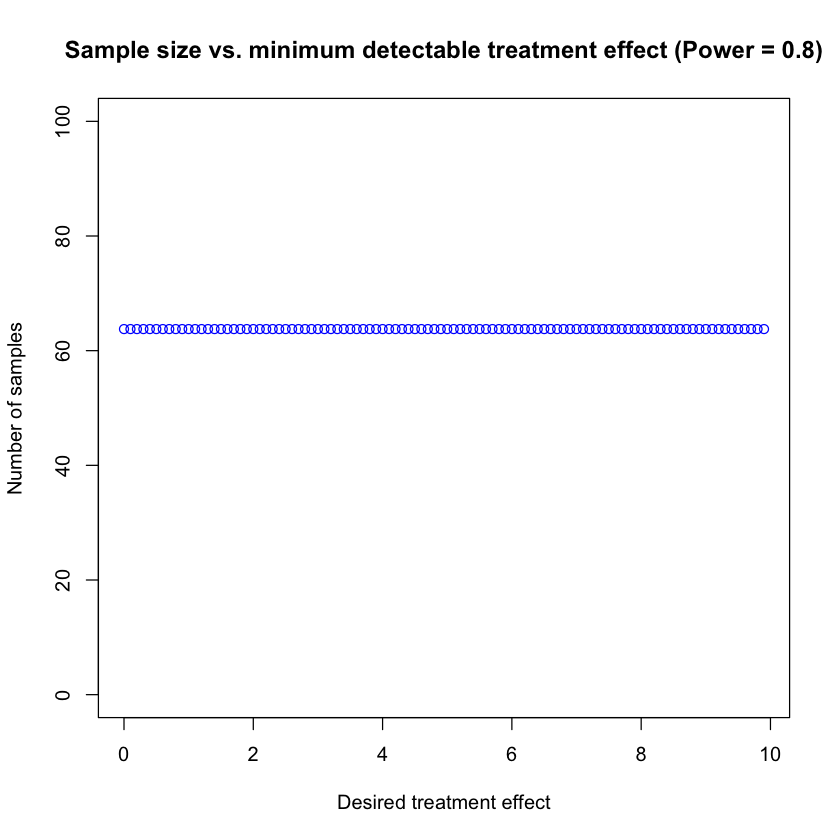

In [3]:
power_sim_by_ate <- function(ate_vector,sig_level=0.05,power=0.8,alternate_hyp="two.sided",max_ratio = 10){
    result <- NA
    for(i in seq_along(ate_vector)){
        result[i] <- power.t.test(d=ate_vector[i], 
                               sig.level=sig_level, 
                               power=power,
                               sd=ate_vector[i]*max_ratio,
                               alternative=alternate_hyp)$n
        }
    return(result)
    }
max_ratio <- 2
expected_ate <- 10
x <- seq(1e-5,expected_ate,by=0.1)
samples <- power_sim_by_ate(ate=x,max_ratio = max_ratio)

plot(x = x, y=samples,col = 'blue',
     xlab="Desired treatment effect",
     ylab = 'Number of samples',ylim=c(0,100),
     main = "Sample size vs. minimum detectable treatment effect (Power = 0.8)")


## Covariates 


- Gender
- Age group 
- Political affiliation 
- Voter / non-voter 
- Fake post indicator/red flag (treatment)
- Belief in post after flagging (outcome)
- Country of origin 
- retweets/popularity
- belief in post before flaggin (pre-treatment outcome)
    

## Experimental Design 

### 2 x 2 

- 2 conditions for political affiliation 
- 2 conditions for treatment and control 

### Treatment assginment 


### Control assignment 

- Create a placebo to determine never-takers and increase precision of estimate treatment effect


## Regression Models


### Outcome: Belief in authenticity of a fake post

1. Baseline model 

 outcome ~ red_flag
 
2. Model with co-variates 

outcome ~ red_flag + gender + factor(age_group) + political_affiliation + pre-treatment-outcome + country + popularity + active_voter 

3. Model with treatment-covariate interactions  

- Test if fake news red flagging affects democrats and republicans differently 
- Test if fake news red flagging affects different age groups differently 
- Test if fake news red flagging affects voters and non voters differently 

